Veri seti boyutu: (344, 5)

İlk 5 satır:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE

Eksik değer sayısı:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Veri tipleri:
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Betimsel istatistikler:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mea

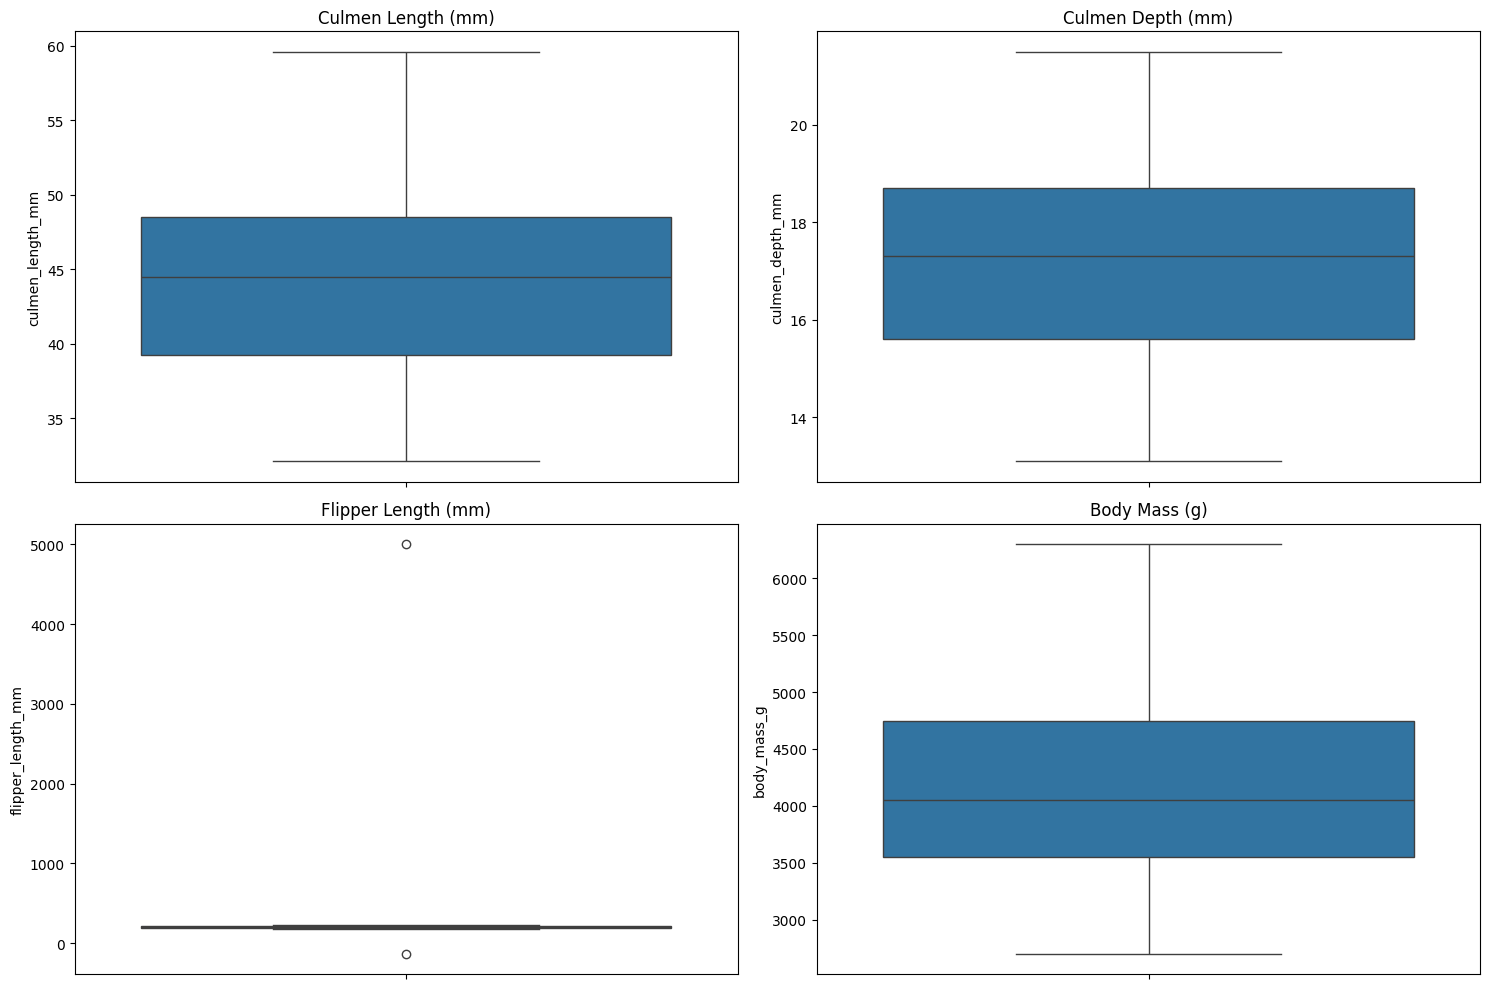

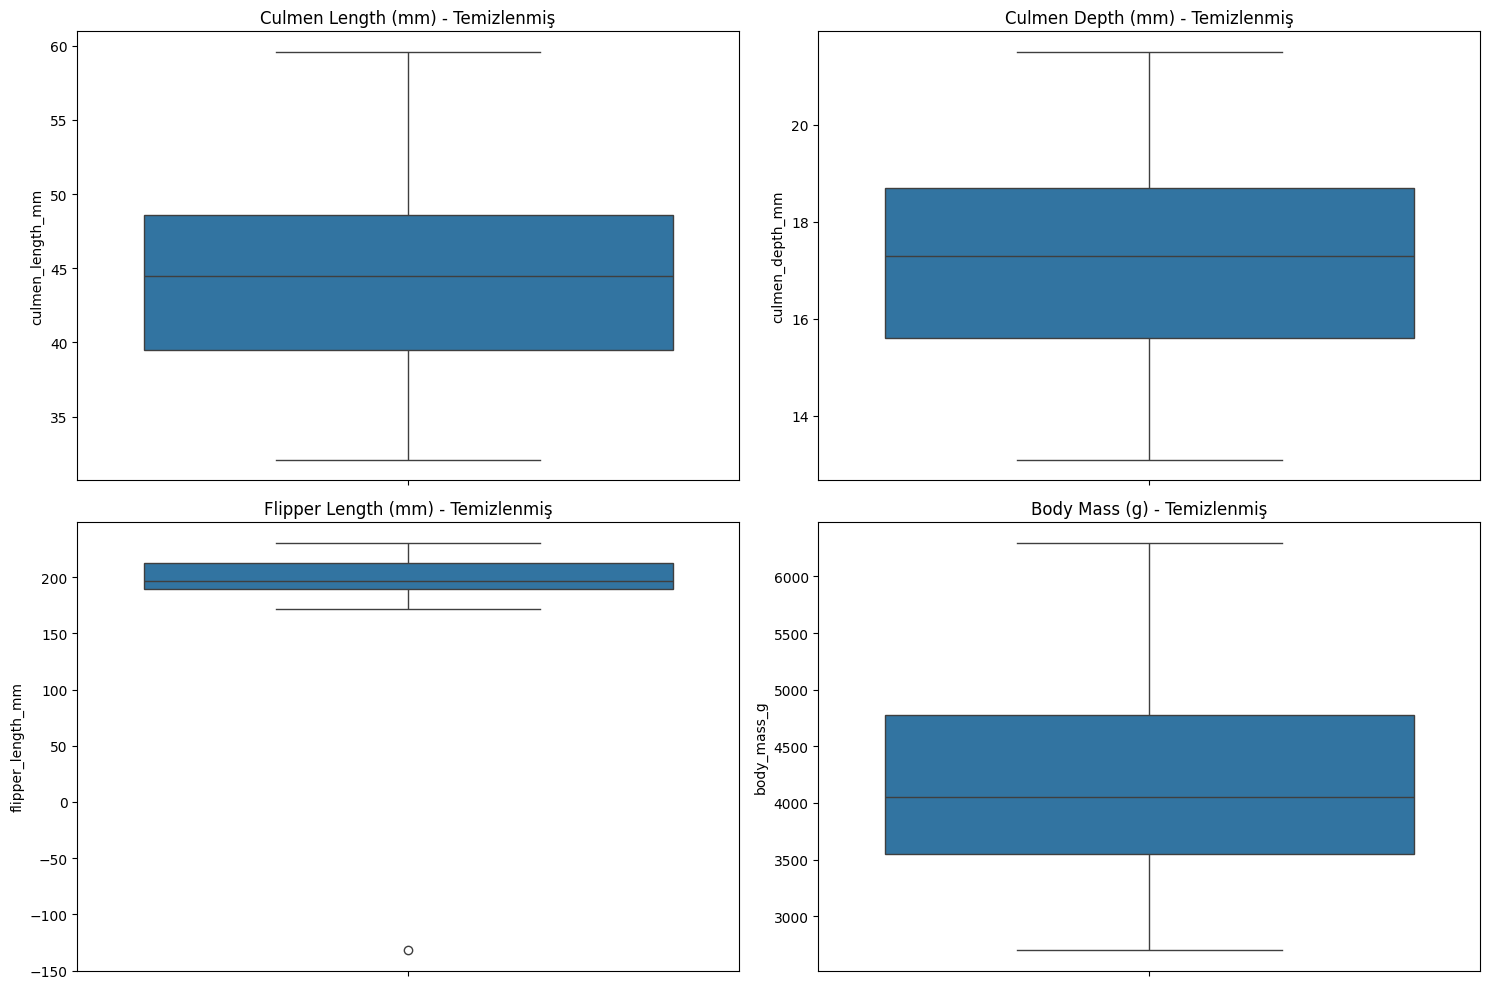

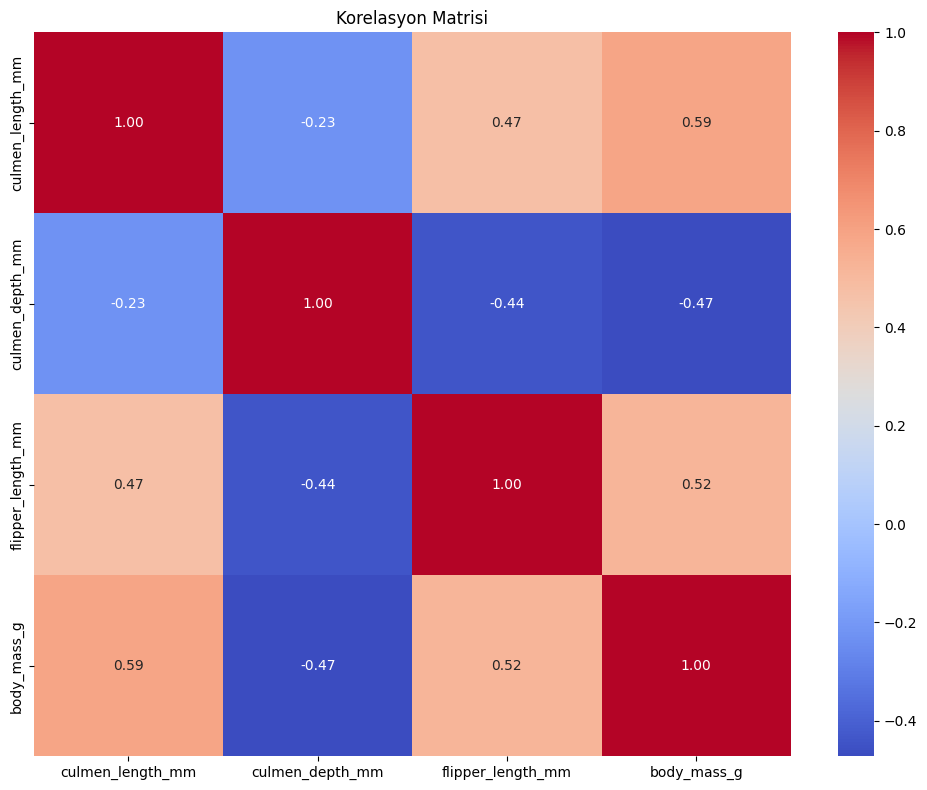

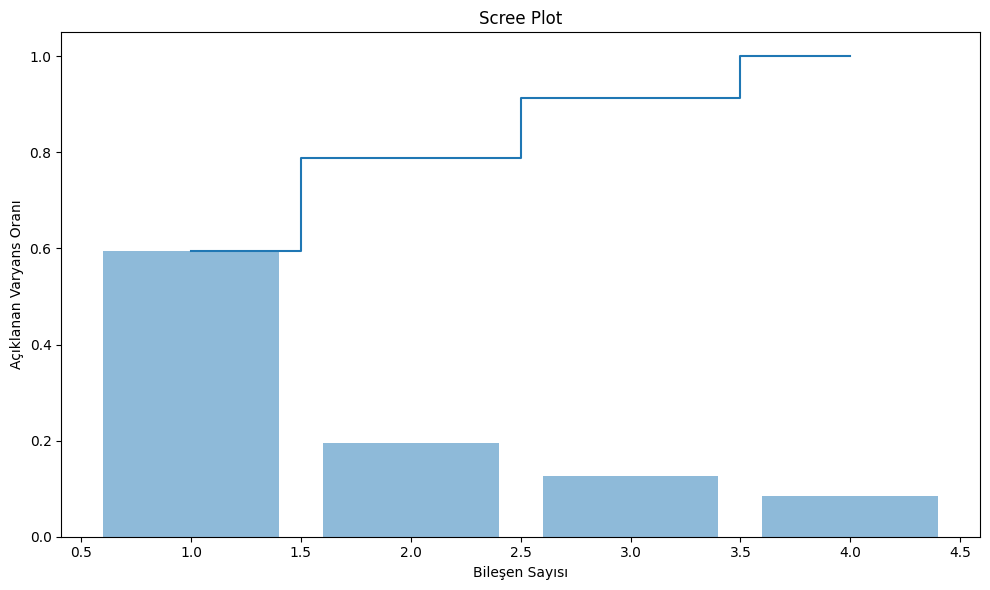

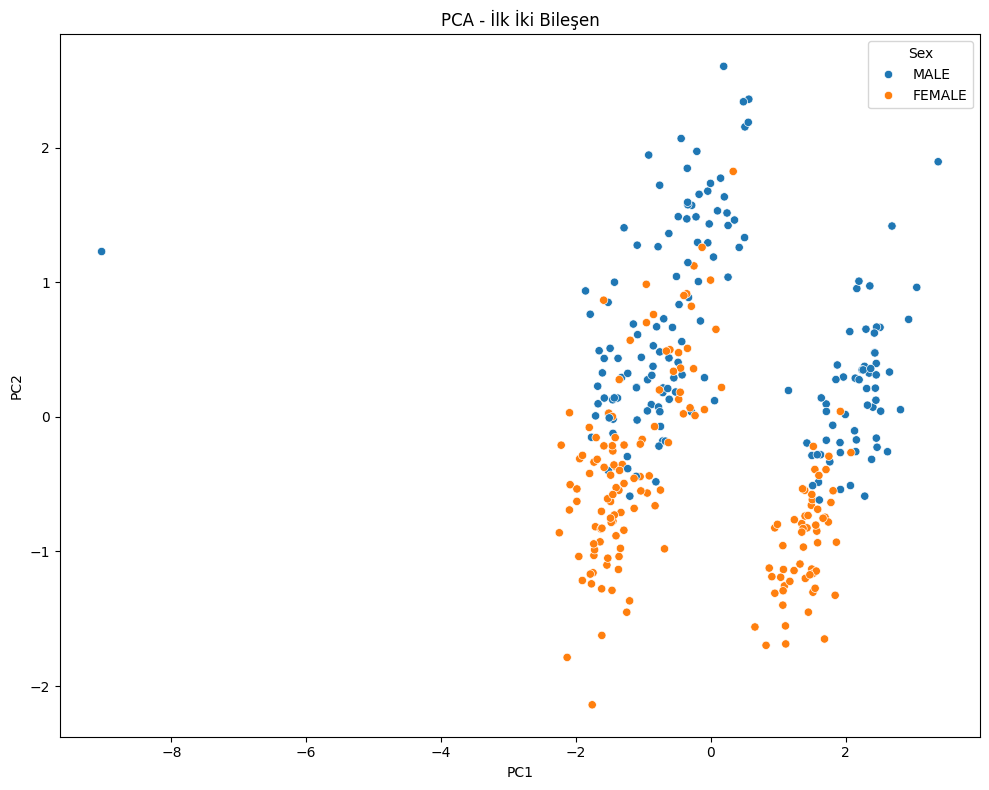

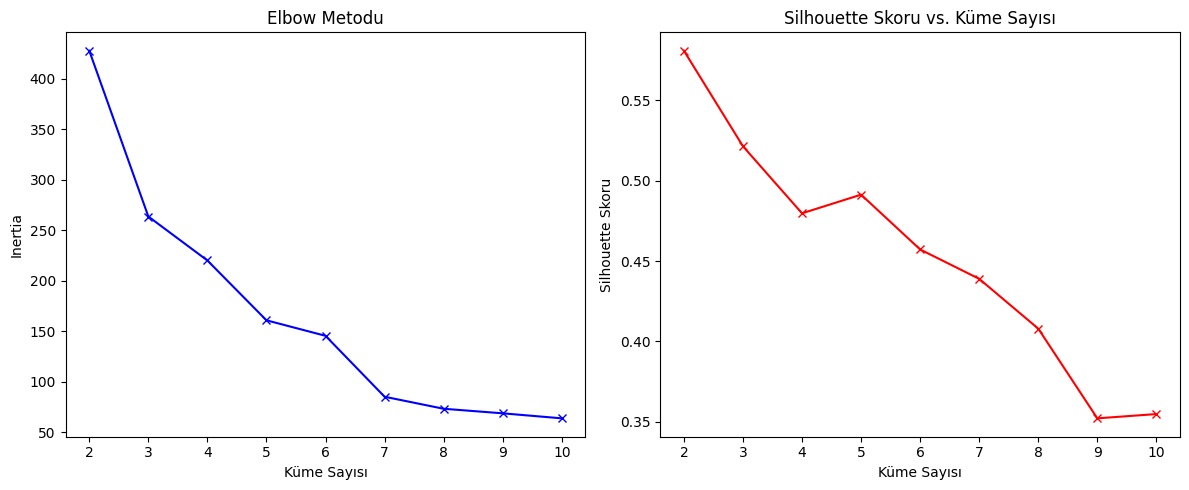

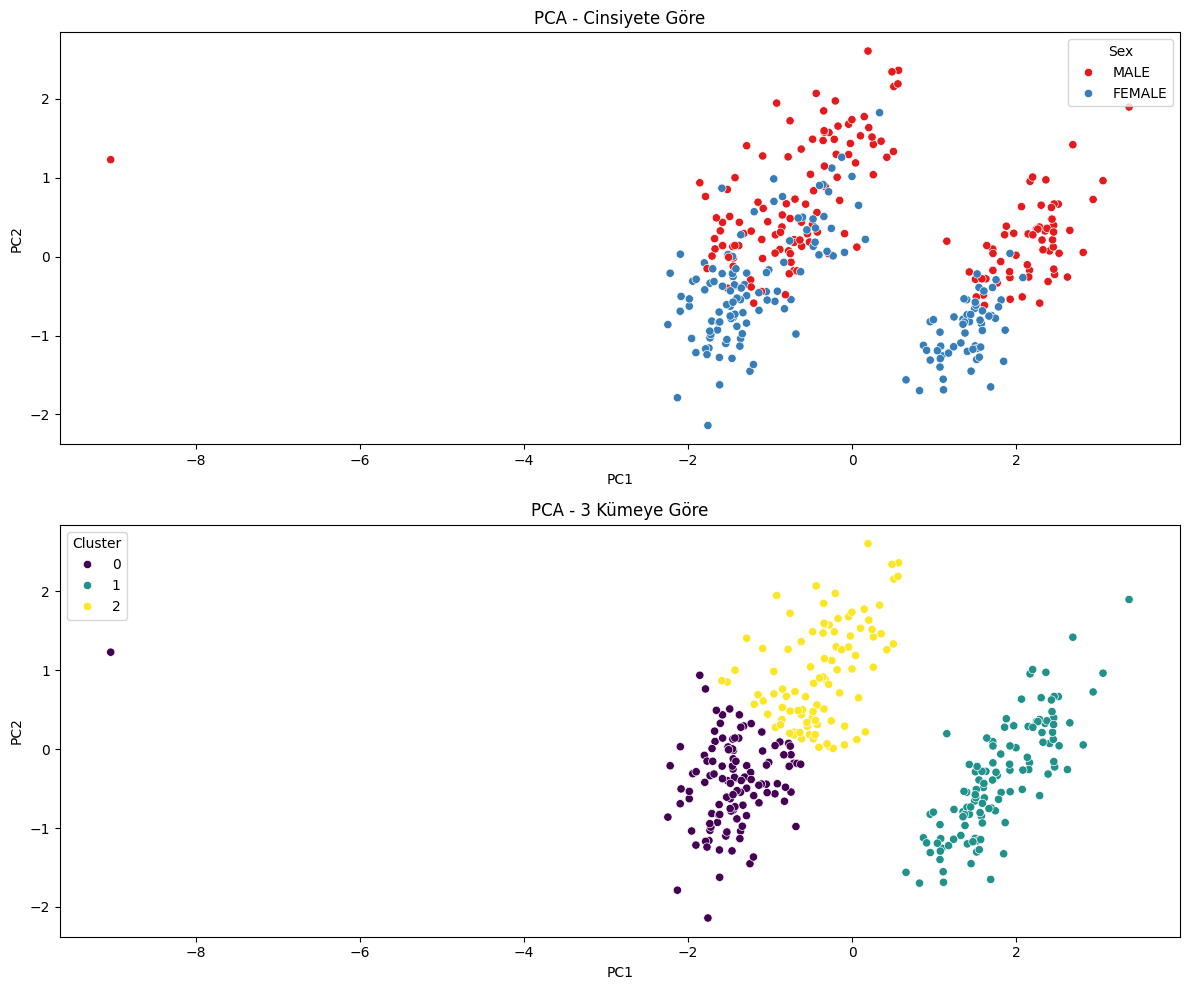

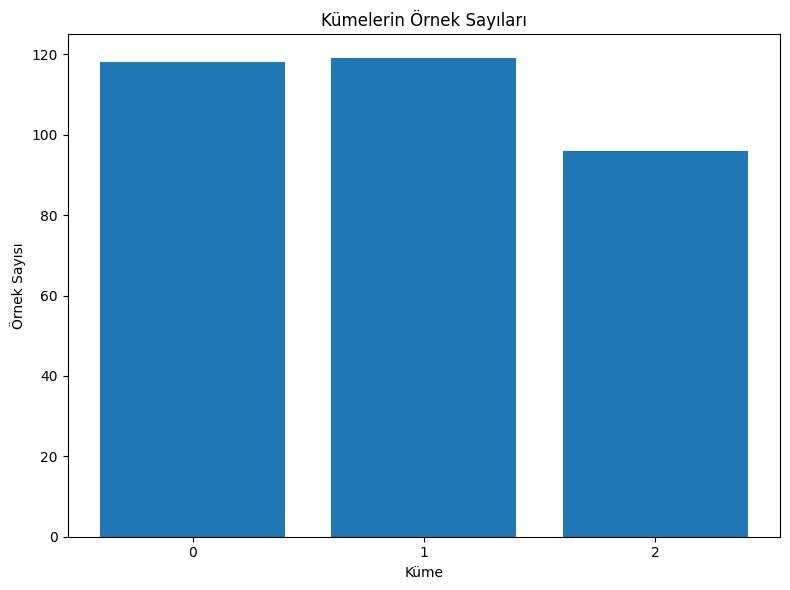

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Veri setini yükleme
df = pd.read_csv('penguins.csv')

# Veri seti hakkında genel bilgi
print("Veri seti boyutu:", df.shape)
print("\nİlk 5 satır:")
print(df.head())

# Eksik değerlerin kontrolü
print("\nEksik değer sayısı:")
print(df.isnull().sum())

# Veri tiplerini kontrol etme
print("\nVeri tipleri:")
print(df.dtypes)

# Betimsel istatistikler
print("\nBetimsel istatistikler:")
print(df.describe())

# Aykırı değerlerin tespiti için kutu grafikleri
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y=df['culmen_length_mm'])
plt.title('Culmen Length (mm)')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['culmen_depth_mm'])
plt.title('Culmen Depth (mm)')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['flipper_length_mm'])
plt.title('Flipper Length (mm)')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['body_mass_g'])
plt.title('Body Mass (g)')
plt.tight_layout()
plt.savefig('boxplots.png')

# Cinsiyetlerin dağılımı
print("\nCinsiyet dağılımı:")
print(df['sex'].value_counts(dropna=False))

# Veri temizliği
# 1. Cinsiyet sütunundaki '.' değerini NA olarak değiştirme
df['sex'] = df['sex'].replace('.', np.nan)

# 2. NA değerlerini içeren satırları çıkarma
df_clean = df.dropna()
print("\nNA değerleri temizlendikten sonra satır sayısı:", df_clean.shape[0])

# 3. Aykırı değerlerin tespiti ve temizlenmesi
# Z-score kullanarak aykırı değerleri tespit etme
def detect_outliers(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores < threshold]

# Tüm sayısal sütunlar için aykırı değerleri temizleme
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numerical_cols:
    df_clean = detect_outliers(df_clean, col)

print("\nAykırı değerler temizlendikten sonra satır sayısı:", df_clean.shape[0])

# Temizlenmiş veri setinin dağılımını gösterme
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y=df_clean['culmen_length_mm'])
plt.title('Culmen Length (mm) - Temizlenmiş')

plt.subplot(2, 2, 2)
sns.boxplot(y=df_clean['culmen_depth_mm'])
plt.title('Culmen Depth (mm) - Temizlenmiş')

plt.subplot(2, 2, 3)
sns.boxplot(y=df_clean['flipper_length_mm'])
plt.title('Flipper Length (mm) - Temizlenmiş')

plt.subplot(2, 2, 4)
sns.boxplot(y=df_clean['body_mass_g'])
plt.title('Body Mass (g) - Temizlenmiş')
plt.tight_layout()
plt.savefig('cleaned_boxplots.png')

# Değişkenler arasındaki korelasyonu kontrol etme
plt.figure(figsize=(10, 8))
correlation = df_clean[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.savefig('correlation.png')

# Özellik seçimi için korelasyon değerlerini inceleme
print("\nKorelasyon matrisi:")
print(correlation)

# Veri standardizasyonu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[numerical_cols])

# PCA uygulaması
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Açıklanan varyans oranı
explained_variance = pca.explained_variance_ratio_
print("\nAçıklanan varyans oranları:", explained_variance)
print("Kümülatif açıklanan varyans:", np.cumsum(explained_variance))

# Scree plot çizimi
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid')
plt.ylabel('Açıklanan Varyans Oranı')
plt.xlabel('Bileşen Sayısı')
plt.title('Scree Plot')
plt.tight_layout()
plt.savefig('scree_plot.png')

# İlk iki bileşeni kullanarak veriyi indirgeme
pca = PCA(n_components=2)
pca_result_2d = pca.fit_transform(scaled_features)

# İndirgenen verinin DataFrame'e dönüştürülmesi
pca_df = pd.DataFrame({
    'PC1': pca_result_2d[:, 0],
    'PC2': pca_result_2d[:, 1],
    'Sex': df_clean['sex']
})

# PCA sonuçlarını görselleştirme
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Sex', data=pca_df)
plt.title('PCA - İlk İki Bileşen')
plt.tight_layout()
plt.savefig('pca_scatter.png')

# Optimum küme sayısını belirleme - Elbow metodu
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result_2d)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_result_2d, kmeans.labels_))

# Elbow metodu grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia')
plt.title('Elbow Metodu')

# Silhouette skoru grafiği
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')
plt.title('Silhouette Skoru vs. Küme Sayısı')
plt.tight_layout()
plt.savefig('clustering_evaluation.png')

# Belirlenen optimum küme sayısı ile KMeans uygulama
optimal_k = 3  # Elbow ve silhouette metodlarına bakarak belirlenir
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result_2d)

# Kümeleme sonuçlarını PCA grafiğinde gösterme
pca_df['Cluster'] = cluster_labels
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Sex', data=pca_df, palette='Set1')
plt.title('PCA - Cinsiyete Göre')

plt.subplot(2, 1, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title(f'PCA - {optimal_k} Kümeye Göre')

plt.tight_layout()
plt.savefig('clustering_results.png')

# Küme ve cinsiyet ilişkisini analiz etme
cluster_sex_crosstab = pd.crosstab(pca_df['Cluster'], pca_df['Sex'])
print("\nKüme-Cinsiyet İlişkisi:")
print(cluster_sex_crosstab)

# Son olarak oluşturulan kümelerin özelliklerini inceleme
df_clean['Cluster'] = cluster_labels
cluster_stats = df_clean.groupby('Cluster').agg({
    'culmen_length_mm': ['mean', 'std'],
    'culmen_depth_mm': ['mean', 'std'],
    'flipper_length_mm': ['mean', 'std'],
    'body_mass_g': ['mean', 'std']
})

print("\nKüme İstatistikleri:")
print(cluster_stats)

# Kümelerin dağılımı
plt.figure(figsize=(8, 6))
cluster_counts = df_clean['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Küme')
plt.ylabel('Örnek Sayısı')
plt.title('Kümelerin Örnek Sayıları')
plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.savefig('cluster_distribution.png')

print("\nAnaliz tamamlandı.")

Veri özeti:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE

Veri boyutu: (344, 5)

Eksik değerler:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Betimsel istatistikler:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         214.014620  4201.754386
std            5.459584         1.974793         260.558057   801.954536
min           32.100000        13.100000 

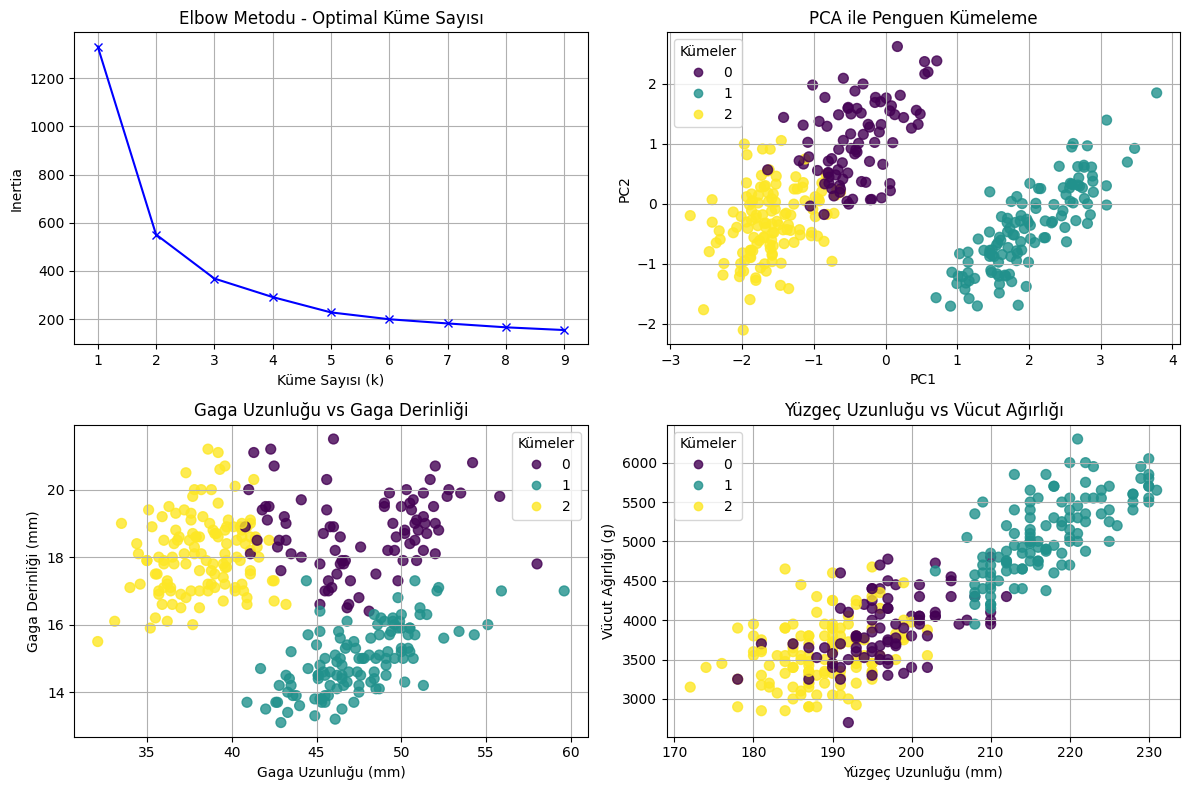

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.impute import SimpleImputer

# Veriyi yükleme
df = pd.read_csv('penguins.csv')

# Veriye ilk bakış
print("Veri özeti:")
print(df.head())
print("\nVeri boyutu:", df.shape)
print("\nEksik değerler:")
print(df.isnull().sum())
print("\nBetimsel istatistikler:")
print(df.describe())

# Veri temizliği
# NA değerleri işleme
print("\nEksik değerleri temizleme...")
# NA içeren satırları saydırma
na_rows = df.isnull().any(axis=1).sum()
print(f"NA içeren satır sayısı: {na_rows}")

# Sayısal verilerde outlier kontrolü
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Hatalı verileri düzeltme (negatif değerler gibi)
print("\nHatalı verileri düzeltme...")
# Negatif flipper_length_mm değerini bulma
print("Negatif yüzgeç uzunluğu:", df[df['flipper_length_mm'] < 0]['flipper_length_mm'])
# Negatif değerleri NA ile değiştirme
df.loc[df['flipper_length_mm'] < 0, 'flipper_length_mm'] = np.nan

# Her sayısal sütun için outlier kontrolü
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
print("\nAykırı değerler (outlier):")
outliers_dict = {}
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    if not outliers.empty:
        print(f"{col}: {len(outliers)} aykırı değer")
        outliers_dict[col] = outliers.index.tolist()

# Tüm outlier indekslerini birleştir
all_outliers = []
for indices in outliers_dict.values():
    all_outliers.extend(indices)
all_outliers = list(set(all_outliers))  # Duplicate'leri kaldır
print(f"Toplam {len(all_outliers)} satır outlier içeriyor")

# NA ve outlier'ları temizlenmiş bir veri seti oluştur
df_clean = df.drop(all_outliers)
df_clean = df_clean.dropna()

print("\nTemizlenmiş veri boyutu:", df_clean.shape)

# Özellik seçimi
# Tüm sayısal özelliklerimizi kullanacağız, ancak cinsiyetin analizi nasıl etkilediğini de görelim
features = df_clean[numerical_cols].copy()

# Veriyi ölçeklendirme (standartlaştırma)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=numerical_cols)

# PCA ile boyut indirgeme
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print("\nPCA varyans oranı:", pca.explained_variance_ratio_)
print("Toplam açıklanan varyans:", sum(pca.explained_variance_ratio_))

# Özellik katkılarını yazdırma
print("\nPCA bileşenlerine özellik katkıları:")
for i, comp in enumerate(pca.components_):
    print(f"Bileşen {i+1}:")
    for feature, value in zip(numerical_cols, comp):
        print(f"  {feature}: {value:.4f}")

# K-means kümeleme - Optimal küme sayısını bulma (Elbow metodu)
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Kümeleme - 3 küme kullanılarak (tahmin edilen penguen türü sayısı)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)

# Sonuçları veri setine ekle
df_clean['cluster'] = clusters
pca_df['cluster'] = clusters

if 'sex' in df_clean.columns:
    pca_df['sex'] = df_clean['sex']

# Görselleştirme
plt.figure(figsize=(12, 8))

# Elbow grafiği
plt.subplot(2, 2, 1)
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Metodu - Optimal Küme Sayısı')
plt.grid(True)

# PCA ile kümelerin görselleştirilmesi
plt.subplot(2, 2, 2)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title('PCA ile Penguen Kümeleme')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title="Kümeler")
plt.grid(True)

# Gaga uzunluğu ve derinliği açısından kümeleme
plt.subplot(2, 2, 3)
scatter = plt.scatter(df_clean['culmen_length_mm'], df_clean['culmen_depth_mm'], c=df_clean['cluster'],
                     cmap='viridis', s=50, alpha=0.8)
plt.title('Gaga Uzunluğu vs Gaga Derinliği')
plt.xlabel('Gaga Uzunluğu (mm)')
plt.ylabel('Gaga Derinliği (mm)')
plt.legend(*scatter.legend_elements(), title="Kümeler")
plt.grid(True)

# Yüzgeç uzunluğu ve vücut ağırlığı açısından kümeleme
plt.subplot(2, 2, 4)
scatter = plt.scatter(df_clean['flipper_length_mm'], df_clean['body_mass_g'], c=df_clean['cluster'],
                     cmap='viridis', s=50, alpha=0.8)
plt.title('Yüzgeç Uzunluğu vs Vücut Ağırlığı')
plt.xlabel('Yüzgeç Uzunluğu (mm)')
plt.ylabel('Vücut Ağırlığı (g)')
plt.legend(*scatter.legend_elements(), title="Kümeler")
plt.grid(True)

plt.tight_layout()
plt.savefig('penguin_clusters.png')

# Kümelenmiş verilerin özet istatistikleri
print("\nKüme bazında özet istatistikler:")
for cluster in df_clean['cluster'].unique():
    print(f"\nKüme {cluster} istatistikleri:")
    print(df_clean[df_clean['cluster'] == cluster][numerical_cols].describe())

# Her kümedeki cinsiyet dağılımı (eğer varsa)
if 'sex' in df_clean.columns:
    print("\nKüme bazında cinsiyet dağılımı:")
    print(pd.crosstab(df_clean['cluster'], df_clean['sex']))

print("\nPenguen türleri analizi tamamlandı!")